<a href="https://colab.research.google.com/github/Andychiang13/codingground/blob/master/sccm_datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path

# Make pandas dataframes prettier
from IPython.display import display, HTML

# Access data using Google BigQuery.
from google.colab import auth
from google.cloud import bigquery

In [0]:
auth.authenticate_user()

In [0]:
project_id='sccm-datathon'
os.environ["GOOGLE_CLOUD_PROJECT"]=project_id

In [0]:
%%bigquery ventilator

SELECT *
FROM `sccm-datathon.team3.ventilator_settings`


In [0]:
ventilator.o2_delivery_device.unique()

array([None, 'None', 'Nasal Cannula', 'Non-Rebreather', 'Face Tent',
       'Hi Flow Neb', 'Aerosol-Cool', 'Ventilator', 'Venti Mask',
       'Trach Mask', 'Cannula', 'Other/Remarks', 'T-Piece', 'Bipap Mask',
       'Medium Conc Mask', 'Hut', 'CPAP Mask', 'Hood', 'Vapotherm',
       'Heated Neb', 'Ultrasonic Neb', 'TranstrachealCat'], dtype=object)

In [0]:
ventilator.o2_delivery_device_2.unique()

array([None, 'Face Tent', 'Nasal Cannula', 'Non-Rebreather', 'None',
       'Medium Conc Mask', 'Aerosol-Cool', 'Trach Mask', 'Hi Flow Neb',
       'CPAP Mask', 'T-Piece', 'Other/Remarks', 'Venti Mask',
       'Bipap Mask', 'TranstrachealCat', 'Heated Neb'], dtype=object)

In [0]:
ventilator.o2_delivery_device_2[ventilator.o2_delivery_device=='Ventilator'].unique()

array([None], dtype=object)

In [0]:
ventilator.ventmode.unique()

array([None, 'Assist Control', 'CPAP+PS', 'Other/Remarks', 'SIMV+PS',
       'CPAP/PSV', 'SIMV/PSV/AutoFlow', 'CMV/ASSIST/AutoFlow',
       'CMV/ASSIST', 'Standby', 'MMV/PSV', 'MMV/PSV/AutoFlow', 'CPAP',
       'APRV', 'Pressure Control', 'PSV/SBT', 'Pressure Support', 'CMV',
       'PCV+Assist', 'PCV+/PSV', 'PCV+', 'SIMV', 'MMV/AutoFlow',
       'CPAP/PSV+ApnPres', 'TCPCV', 'VOL/AC', 'CPAP/PPS', 'MMV',
       'CMV/AutoFlow', 'PRVC/AC', 'SIMV/PSV', 'APRV/Biphasic+ApnVol',
       'CPAP/PSV+ApnVol', 'PRES/AC', 'SIMV/PRES', 'SIMV/AutoFlow',
       'Apnea Ventilation', 'SIMV/VOL', 'PRVC/SIMV', 'SYNCHRON MASTER',
       'CPAP/PSV+Apn TCPL', 'SYNCHRON SLAVE', 'APRV/Biphasic+ApnPress'],
      dtype=object)

In [0]:
ventilator.plateau_pressure.max(),ventilator.plateau_pressure.min()

(247.0, 0.0)

In [0]:
ventilator.ventmode.isnull().sum()

1617708

In [0]:
demo.icu_mortality

0         41.617
1          8.133
2         91.283
3          6.517
4          4.633
          ...   
61527    215.233
61528     81.600
61529     19.817
61530    223.450
61531    579.817
Name: icu_los_hours, Length: 61532, dtype: float64

In [0]:
%%bigquery cohort

SELECT * 
FROM `sccm-datathon.team3.cohort`
order by icustay_id

Patient number after exclusion and inclusion criteria (TBI and CVA)

In [0]:
data_icustay_id_bl=(cohort.exclusion_bad_data==0)&(cohort.exclusion_non_adults==0)&(cohort.exclusion_non_stroke_or_tbi==0)&(cohort.exclusion_ventilated_lt_24hours==0)&((cohort.stroke==1)|(cohort.tbi==1))
data_icustay_id=cohort.icustay_id[data_icustay_id_bl]
data_icustay_id

12       200019
113      200166
139      200208
163      200249
187      200290
          ...  
61071    299247
61289    299609
61385    299760
61414    299806
61499    299949
Name: icustay_id, Length: 1350, dtype: int64

In [0]:
np.sum(cohort.exclusion_secondary_stay)

32.0

In [0]:
%%bigquery demo

SELECT *
FROM `sccm-datathon.team3.demographics`
order by icustay_id

In [0]:
demo.vent_endoffset

0           NaN
1        6790.0
2         982.0
3           NaN
4        1406.0
          ...  
61527       NaN
61528    6984.0
61529     841.0
61530     906.0
61531     792.0
Name: vent_endoffset, Length: 61532, dtype: float64

In [0]:
demo_extract = demo[['icustay_id','tbi','stroke','icu_mortality','hospital_mortality','thirty_day_mortality','ninety_day_mortality']]
demo_extract['hosp_los_days'] = demo.hosp_los_hours/24
demo_extract['icu_los_days'] = demo['icu_los_hours']/24
demo_extract['vent_duration_days'] = (demo['vent_endoffset'] - demo['vent_startoffset'])/60/24
demo_extract['vent_free_days'] = demo['hosp_los_hours']/24 - demo_extract['vent_duration_days']

demo_final = demo_extract[data_icustay_id_bl]
demo

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,subject_id,hadm_id,icustay_id,tbi,stroke,intime,intime_offset,outtime_offset,stay_number,admission_location,discharge_location,pre_icu_los_hours,icu_los_hours,icu_mortality,hosp_los_hours,hospital_mortality,thirty_day_mortality,ninety_day_mortality,age,service,gender,weight_kg,height_cm,ethnicity,oasis,oasis_prob,apsiii,apsiii_prob,vent_startoffset,vent_endoffset
0,55973,152234,200001,0,0,2181-11-25 19:06:12,0,4433.0,6,CLINIC REFERRAL/PREMATURE,SNF,171.033,73.883,0,381.633,0,0,0,61.0499,MED,F,61,170.18,asian,39,0.231102,63,0.188678,NaN,NaN
1,27513,163557,200003,0,0,2199-08-02 19:50:04,0,8479.0,1,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,2.800,141.317,0,481.967,0,0,1,48.2940,SURG,M,77,None,white,35,0.152892,48,0.102705,1330.0,6790.0
2,10950,189514,200006,0,0,2159-09-03 11:28:14,0,1900.0,3,EMERGENCY ROOM ADMIT,HOME,0.017,31.667,0,55.300,0,0,0,54.0710,MED,M,82.4,None,other,32,0.109623,23,0.033927,92.0,982.0
3,20707,129310,200007,0,0,2109-02-17 10:03:37,0,1860.0,1,EMERGENCY ROOM ADMIT,HOME,0.017,31.000,0,77.750,0,0,0,43.3439,CMED,M,126,177.8,white,26,0.054187,33,0.053332,NaN,NaN
4,29904,129607,200009,0,0,2189-11-30 10:34:32,0,3103.0,1,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,-0.183,51.717,0,148.250,0,0,0,47.5548,CSURG,F,78.2,160.02,white,25,0.048012,26,0.038894,456.0,1406.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61527,13620,169431,299993,0,0,2149-11-13 21:01:05,0,4076.0,1,TRANSFER FROM HOSP/EXTRAM,HOME,0.017,67.933,0,353.500,0,0,0,26.2264,SURG,M,None,None,white,23,0.037612,27,0.040700,NaN,NaN
61528,10718,177406,299994,0,0,2114-12-09 11:56:00,0,9153.0,2,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,137.817,152.550,0,550.133,0,0,0,74.2165,MED,F,72.6,157.48,white,30,0.087098,43,0.082882,4429.0,6984.0
61529,28775,134959,299995,0,0,2116-03-04 17:44:39,0,2899.0,1,EMERGENCY ROOM ADMIT,HOME,0.017,48.317,0,70.283,0,0,0,23.3763,NMED,M,70.4,None,white,34,0.137099,26,0.038894,76.0,841.0
61530,69587,158288,299998,0,0,2181-07-05 18:47:40,0,2797.0,1,PHYS REFERRAL/NORMAL DELI,REHAB/DISTINCT PART HOSP,11.533,46.617,0,704.800,0,0,0,86.9560,GU,M,90,None,white,32,0.109623,22,0.032412,13.0,906.0


In [0]:
demo_final.to_csv('outcome_table_no_gcs.csv')

In [0]:
demo_final.columns

Index(['icustay_id', 'tbi', 'stroke', 'icu_mortality', 'hospital_mortality',
       'thirty_day_mortality', 'ninety_day_mortality', 'icu_los_days',
       'vent_duration_days', 'vent_free_days'],
      dtype='object')

In [0]:
# install and import tableone
!pip install tableone
from tableone import TableOne

In [0]:
columns = ['icu_mortality', 'hospital_mortality',
       'thirty_day_mortality', 'ninety_day_mortality', 'icu_los_days',
       'vent_duration_days', 'vent_free_days','hosp_los_days']

groupby = 'tbi'

pval = False

categorical = ['icu_mortality', 'hospital_mortality',
       'thirty_day_mortality', 'ninety_day_mortality']

t = TableOne(demo_final, columns=columns, categorical=categorical, groupby=groupby, pval=pval)
t.tableone

Grouped by tbi                          
                              Missing            0            1
n                                              809          541
icu_mortality        0              0   512 (63.3)   400 (73.9)
                     1                  297 (36.7)   141 (26.1)
hospital_mortality   0              0   408 (50.4)   346 (64.0)
                     1                  401 (49.6)   195 (36.0)
thirty_day_mortality 0              0   389 (48.1)   337 (62.3)
                     1                  420 (51.9)   204 (37.7)
ninety_day_mortality 0              0   350 (43.3)   322 (59.5)
                     1                  459 (56.7)   219 (40.5)
icu_los_days                        0    6.8 (5.4)    6.6 (5.5)
vent_duration_days                  0    4.6 (4.6)    4.5 (4.1)
vent_free_days                      0   9.1 (13.7)    8.4 (9.7)
hosp_los_days                       0  13.6 (14.4)  12.9 (10.8)

In [0]:
# install and import tableone
!pip install tableone
from tableone import TableOne

In [0]:
%%bigquery gcs

select *
from `sccm-datathon.team3.gcs`
order by icustay_id

In [0]:
gcs

,icustay_id,chartoffset,gcs,gcsmotor,gcsverbal,gcseyes,endotrachflag
0,200019,-63,12.0,NaN,NaN,1.0,0
1,200019,-33,15.0,6.0,0.0,1.0,1
2,200019,-3,15.0,6.0,0.0,1.0,1
3,200019,117,15.0,6.0,0.0,1.0,1
4,200019,237,15.0,6.0,0.0,1.0,1
...,...,...,...,...,...,...,...
93218,299949,5298,14.0,6.0,5.0,3.0,0
93219,299949,5538,14.0,6.0,5.0,3.0,0
93220,299949,5658,14.0,6.0,5.0,3.0,0
93221,299949,5898,15.0,6.0,5.0,4.0,0


In [0]:
gcs.icustay_id.iloc[2]

200019

In [0]:
demo_final_2 = demo_final.reset_index().drop(['index'],axis=1)
demo_final_2

,icustay_id,tbi,stroke,icu_mortality,hospital_mortality,thirty_day_mortality,ninety_day_mortality,hosp_los_days,icu_los_days,vent_duration_days,vent_free_days
0,200019,0,1,1,1,1,1,3.059708,3.059042,1.125000,1.934708
1,200166,0,1,0,0,0,0,26.360417,17.608333,3.479167,22.881250
2,200208,1,0,0,0,0,0,8.170125,6.379167,2.916667,5.253458
3,200249,0,1,0,0,0,1,20.751375,13.475000,8.958333,11.793042
4,200290,0,1,0,0,0,1,18.956958,17.038208,15.343056,3.613903
...,...,...,...,...,...,...,...,...,...,...,...
1345,299247,1,0,0,0,0,0,18.654875,12.821542,9.277778,9.377097
1346,299609,1,0,0,0,0,0,18.754167,4.013875,1.333333,17.420833
1347,299760,1,0,0,0,0,0,6.159042,1.532625,1.072917,5.086125
1348,299806,1,0,0,0,0,0,9.187500,4.402083,2.000000,7.187500


In [0]:
idd = gcs.icustay_id[0]
n=1
a=pd.DataFrame(np.zeros((len(demo_final_2),)),columns=['gcs_dis'])
b=pd.DataFrame(np.zeros((len(demo_final_2),)), columns=['gcs_adm'])
b['gcs_adm'][0]=gcs.gcsmotor[0]

for i in range(len(gcs)):
  if gcs.icustay_id[i] == idd:
    idd = gcs.icustay_id[i]
  else:
    a['gcs_dis'][n-1] = gcs.gcsmotor[i-1]
    b['gcs_adm'][n] = gcs.gcsmotor[i]
    idd = gcs.icustay_id[i]
    n+=1

demo_final_3 = pd.concat([demo_final_2,a,b], axis=1)
demo_final_3['gcs_dis_bool']=demo_final_3.gcs_dis==6
demo_final_3['gcs_adm_bool']=demo_final_3.gcs_adm==6
demo_final_3
demo_final_3.to_csv('outcome_table_with_gcs_1350_2.csv')

In [0]:
columns = ['icu_mortality', 'hospital_mortality',
       'thirty_day_mortality', 'ninety_day_mortality', 'icu_los_days',
       'vent_duration_days', 'vent_free_days','hosp_los_days','gcs_dis_bool','gcs_adm_bool']

groupby = 'tbi'

pval = False

categorical = ['icu_mortality', 'hospital_mortality',
       'thirty_day_mortality', 'ninety_day_mortality','gcs_dis_bool','gcs_adm_bool']

t = TableOne(demo_final_3, columns=columns, categorical=categorical, groupby=groupby, pval=pval)
t.tableone

Grouped by tbi                          
                                  Missing            0            1
n                                                  809          541
icu_mortality        0                  0   512 (63.3)   400 (73.9)
                     1                      297 (36.7)   141 (26.1)
hospital_mortality   0                  0   408 (50.4)   346 (64.0)
                     1                      401 (49.6)   195 (36.0)
thirty_day_mortality 0                  0   389 (48.1)   337 (62.3)
                     1                      420 (51.9)   204 (37.7)
ninety_day_mortality 0                  0   350 (43.3)   322 (59.5)
                     1                      459 (56.7)   219 (40.5)
icu_los_days                            0    6.8 (5.4)    6.6 (5.5)
vent_duration_days                      0    4.6 (4.6)    4.5 (4.1)
vent_free_days                          0   9.1 (13.7)    8.4 (9.7)
hosp_los_days                           0  13.6 (14.4)  12.9 (10.8)
gcs_dis_bool         False              0   466 (57.6)   275 (50.8)
                     True                   343 (42.4)   266 (49.2)
gcs_adm_bool         False              0   677 (83.7)   459 (84.8)
                     True                   132 (16.3)    82 (15.2)

In [0]:
columns = ['gcs_dis_bool']
groupby = 'hospital_mortality'
pval = False
categorical = ['gcs_dis_bool']
t=TableOne(demo_final_3,columns=columns, categorical=categorical,groupby=groupby,pval=pval)
t.tableone

Grouped by hospital_mortality                        
                                         Missing           0           1
n                                                        754         596
gcs_dis_bool False                             0  186 (24.7)  555 (93.1)
             True                                 568 (75.3)    41 (6.9)

In [0]:
columns = ['hospital_mortality']
groupby = 'gcs_dis_bool'
pval = False
categorical = ['hospital_mortality']
t=TableOne(demo_final_3,columns=columns, categorical=categorical,groupby=groupby,pval=pval)
t.tableone

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


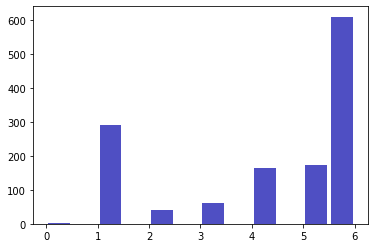

In [74]:
n, bins, patches = plt.hist(x=demo_final_3.gcs_dis, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

In [77]:
idd = gcs.icustay_id[0]
n=1
a=pd.DataFrame(np.zeros((len(demo_final_2),)),columns=['gcs_dis'])
b=pd.DataFrame(np.zeros((len(demo_final_2),)), columns=['gcs_adm'])
c=pd.DataFrame(np.zeros((len(demo_final_2),)), columns = ['gcs_total_dis'])
b['gcs_adm'][0]=gcs.gcsmotor[0]

for i in range(len(gcs)):
  if gcs.icustay_id[i] == idd:
    idd = gcs.icustay_id[i]
  else:
    a['gcs_dis'][n-1] = gcs.gcsmotor[i-1]
    c['gcs_total_dis'][n-1] = gcs.gcs[i-1]
    b['gcs_adm'][n] = gcs.gcsmotor[i]
    idd = gcs.icustay_id[i]
    n+=1

demo_final_4 = pd.concat([demo_final_2,a,b,c], axis=1)
demo_final_4['gcs_dis_bool']=demo_final_3.gcs_dis==6
demo_final_4['gcs_adm_bool']=demo_final_3.gcs_adm==6
demo_final_4

,icustay_id,tbi,stroke,icu_mortality,hospital_mortality,thirty_day_mortality,ninety_day_mortality,hosp_los_days,icu_los_days,vent_duration_days,vent_free_days,gcs_dis,gcs_adm,gcs_total_dis,gcs_dis_bool,gcs_adm_bool
0,200019,0,1,1,1,1,1,3.059708,3.059042,1.125000,1.934708,4.0,NaN,7.0,False,False
1,200166,0,1,0,0,0,0,26.360417,17.608333,3.479167,22.881250,6.0,3.0,15.0,True,False
2,200208,1,0,0,0,0,0,8.170125,6.379167,2.916667,5.253458,6.0,5.0,13.0,True,False
3,200249,0,1,0,0,0,1,20.751375,13.475000,8.958333,11.793042,5.0,6.0,15.0,False,True
4,200290,0,1,0,0,0,1,18.956958,17.038208,15.343056,3.613903,4.0,1.0,15.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,299247,1,0,0,0,0,0,18.654875,12.821542,9.277778,9.377097,6.0,4.0,15.0,True,False
1346,299609,1,0,0,0,0,0,18.754167,4.013875,1.333333,17.420833,6.0,5.0,14.0,True,False
1347,299760,1,0,0,0,0,0,6.159042,1.532625,1.072917,5.086125,6.0,6.0,15.0,True,True
1348,299806,1,0,0,0,0,0,9.187500,4.402083,2.000000,7.187500,6.0,1.0,13.0,True,False


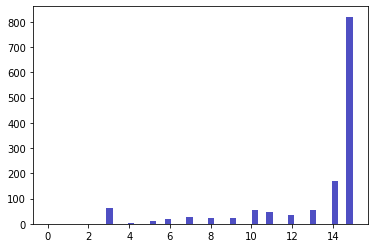

In [79]:
n, bins, patches = plt.hist(x=demo_final_4.gcs_total_dis, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

In [0]:
dist.plot.kde(ax=ax, legend=False, title='Histogram: A vs. B')
dist.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')